# 1. Getting Started: Airbnb Copenhagen

This assignment deals with the most recent Airbnb listings in Copenhagen. The data is collected from [Inside Airbnb](http://insideairbnb.com/copenhagen). Feel free to explore the website further in order to better understand the data. The data (*listings.csv*) has been collected as raw data and needs to be preprocessed.

**Hand-in:** Hand in as a group in Itslearning in a **single**, well-organized and easy-to-read Jupyter Notebook. Please just use this notebook to complete the assignment.

If your group consists of students from different classes, upload in **both** classes.

The first cell does some preprocessing. Please just run these cells and do not change anything. The assignment starts below. Make sure that listings.csv' is in the same folder as this notebook




<>:57: SyntaxWarning: invalid escape sequence '\$'
<>:57: SyntaxWarning: invalid escape sequence '\$'
/var/folders/sl/pdxv_bjx4rq5n98q3q5fmrtw0000gp/T/ipykernel_63322/3640235165.py:57: SyntaxWarning: invalid escape sequence '\$'
  data_filtered['price'] = data_filtered['price'].replace('[\$,]', '', regex=True).astype(float)


,id,name,host_id,host_name,neighbourhood_cleansed,latitude,longitude,room_type,price,minimum_nights,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,calculated_host_listings_count,availability_365,accommodates,bedrooms,price_category
0,6983,Copenhagen 'N Livin',16774,Simon,Nørrebro,55.686410,12.547410,Entire home/apt,898.0,3,...,4.86,4.89,4.73,4.71,1.08,1,0,2,1.0,0
1,26057,Lovely house - most attractive area,109777,Kari,Indre By,55.693070,12.576490,Entire home/apt,2600.0,4,...,4.93,4.86,4.94,4.81,0.55,1,303,6,4.0,1
2,26473,City Centre Townhouse Sleeps 1-10 persons,112210,Julia,Indre By,55.676020,12.575400,Entire home/apt,3250.0,3,...,4.78,4.70,4.89,4.59,2.06,3,56,11,6.0,1
3,29118,Best Location in Cool Istedgade,125230,Nana,Vesterbro-Kongens Enghave,55.670230,12.555040,Entire home/apt,725.0,7,...,5.00,5.00,4.87,4.80,0.16,1,59,2,1.0,0
4,31094,"Beautiful, spacious, central, renovated Penthouse",129976,Ebbe,Vesterbro-Kongens Enghave,55.666602,12.555283,Entire home/apt,1954.0,3,...,4.87,4.82,4.80,4.53,0.13,1,0,6,4.0,1


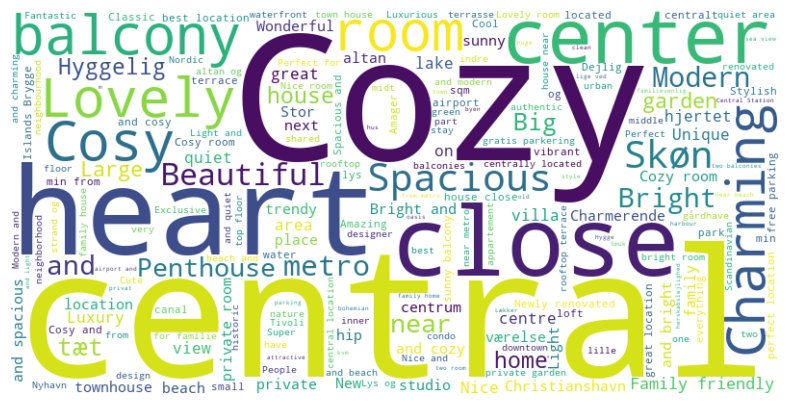

In [37]:
# pip install pandas
# pip install scikit-learn
import pandas as pd
import sklearn as sk

# load the data
data = pd.read_csv('listings.csv')

# filter relevant columns
data_limited = data[["id",
    "name",
    "host_id"  ,
    "host_name" , 
    "neighbourhood_cleansed"  ,
    "latitude"  ,
    "longitude"  ,
    "room_type"  ,
    "price"  ,
    "minimum_nights"  ,
    "number_of_reviews",  
    "last_review"  ,
    "review_scores_rating"  ,
    "review_scores_accuracy" , 
    "review_scores_cleanliness"  ,
    "review_scores_checkin"  ,
    "review_scores_communication"  ,
    "review_scores_location"  ,
    "review_scores_value"  ,
    "reviews_per_month"  ,
    "calculated_host_listings_count"  ,
    "availability_365",
    "accommodates",
    "bedrooms"]]

# removing rows with no reviews

data_filtered = data_limited.loc[data_limited['number_of_reviews'] != 0]

# remove nan

data_filtered = data_filtered.dropna()
data_filtered.head()

# get a list of distinct values from neighbourhood_cleansed columns in data_filtered

neighbourhoods = data_filtered["neighbourhood_cleansed"].unique()

# replace e.g. Nrrbro with Nørrebro in neighbourhood_cleansed column

data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Nrrebro", "Nørrebro")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("sterbro", "Østerbro")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Vanlse", "Vanløse")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Brnshj-Husum", "Brønshøj-Husum")
neighbourhoods = data_filtered["neighbourhood_cleansed"].unique()

# Remove dollar signs and commas and convert to float - note the prices are actually in DKK
data_filtered['price'] = data_filtered['price'].replace('[\$,]', '', regex=True).astype(float)

# Calculate the median price
median_price = data_filtered['price'].median()

# Create a new column 'price_category' with 0 for 'affordable' and 1 for 'expensive'
data_filtered['price_category'] = (data_filtered['price'] > median_price).astype(int)

display(data_filtered.head())

# Describe the apartments using a wordcloud
# Remember to install packages
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine the two lists of stop words
stop_words = ['Østerbro', 'Copenhagen', 'København', 'in', 'bedroom', 'bedrooms', 'bed', 'beds', 'bath', 'baths', 'Frederiksberg', 'V', 'Ø', 'SV', 'S', 'N', 'K', 'C', 'W', 'kbh', 'Ballerup', 'Hellerup', 'Valby', 'Vanløse', 'Brønhøj', 'Nørrebro', 'Vesterbro', "CPH", "with", "to", "of", "a", "the", "på", "i", "med", "af", "at", "city", "by", "apartment", "appartment", "lejlighed", "flat", "m2", "apt"]

# Convert the 'name' column to a single string
text = ' '.join(data_filtered['name'].astype(str))

# Create and generate a word cloud image
wordcloud = WordCloud(stopwords=stop_words, background_color="white", width=800, height=400).generate(text)

# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Your tasks start here


### 1. Since data science is so much fun, provide a word cloud of the names of the hosts, removing any names of non-persons. Does this more or less correspond with the distribution of names according to [Danmarks Statistik](https://www.dst.dk/da/Statistik/emner/borgere/navne/navne-i-hele-befolkningen)?

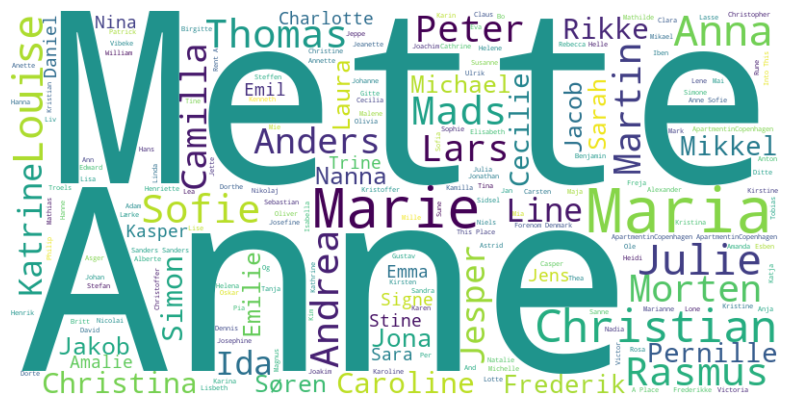

In [38]:
# State your solution here. Add more cells if needed.
names = ' '.join(data_filtered['host_name'].astype(str))

# Define the stopwords list to avoid showing companies
sw = ["Apartment inCopenhaguen", "ApartmentinCopenhaguen"]

wordcloud = WordCloud(stopwords=sw, background_color="white", width=800, height=400).generate(names)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### 2. Using non-scaled versions of latitude and longitude, plot the listings data on a map.

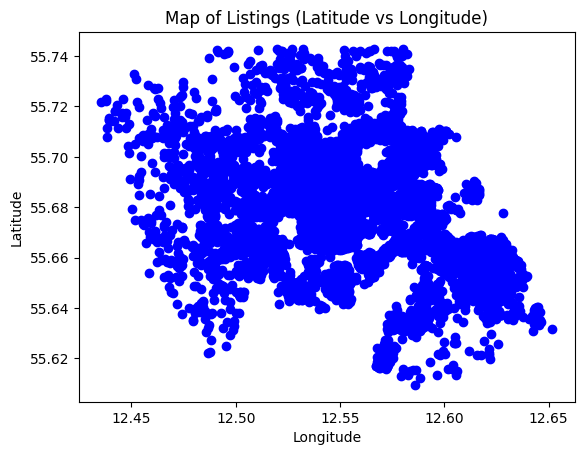

In [39]:
# State your solution here. Add more cells if needed.
varX = data_filtered['longitude']
varY = data_filtered['latitude']

fig, ax = plt.subplots()

ax.scatter(varX, varY, c='blue', marker='o')

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Map of Listings (Latitude vs Longitude)')

plt.show()

In [40]:
import folium

# Assuming data_filtered contains 'latitude' and 'longitude' columns
# Calculate the center of the map for the initial view
map_center = [data_filtered['latitude'].mean(), data_filtered['longitude'].mean()]

# Create a Folium map centered around the listings
mymap = folium.Map(location=map_center, zoom_start=12)

# Iterate through the data and add markers for each listing
for idx, row in data_filtered.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(mymap)

# Display the map, it takes close to a minute to render on my machine
# If you want to show the map, uncomment the following line. Good luck with it
#mymap

### 3. Create boxplots where you have the neighbourhood on the x-axis and price on the y-axis. What does this tell you about the listings in Copenhagen? Keep the x-axis as is and move different variables into the y-axis to see how things are distributed between the neighbourhoods to create different plots (your choice).

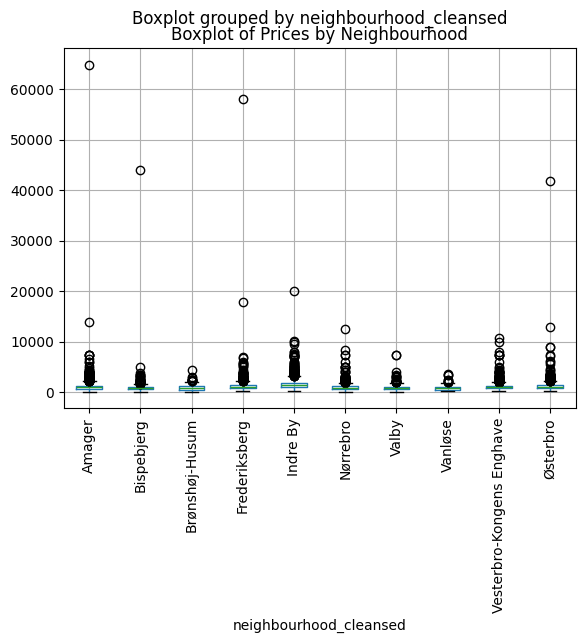

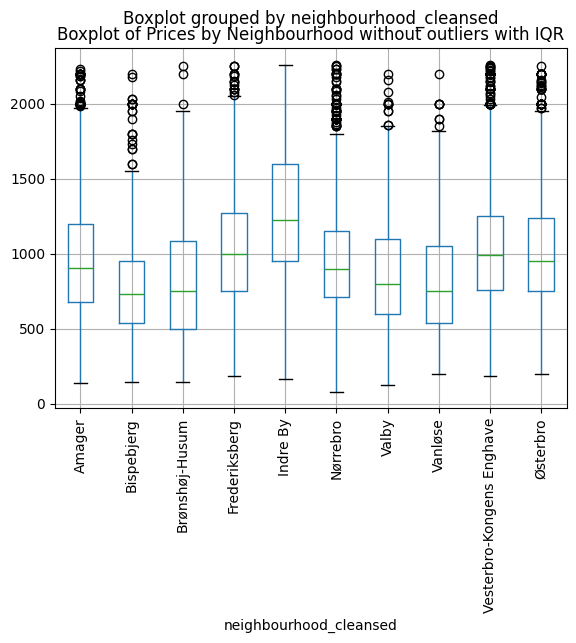

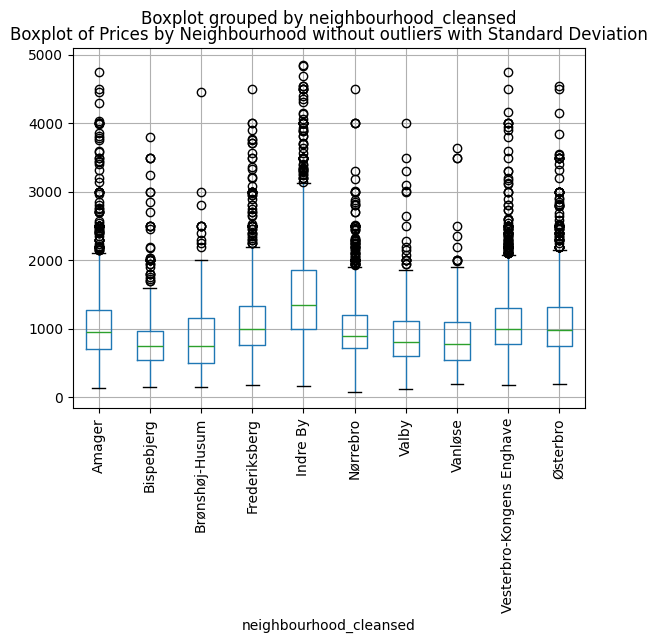

In [41]:
import matplotlib.pyplot as plt

# Merge neighbourhoods with similar name
data_filtered['neighbourhood_cleansed'] = data_filtered['neighbourhood_cleansed'].replace(
    {'Amager Vest': 'Amager', 'Amager st': 'Amager'}
)

data_filtered.boxplot(column='price', by='neighbourhood_cleansed', rot=90)

plt.title("Boxplot of Prices by Neighbourhood")

plt.show()

# removing the outliers based on IQR

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = data_filtered['price'].quantile(0.25)
Q3 = data_filtered['price'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the dataset to remove outliers
data_filtered_no_outliers = data_filtered[(data_filtered['price'] >= lower_bound) & (data_filtered['price'] <= upper_bound)]

# Now plot the boxplot without outliers
data_filtered_no_outliers.boxplot(column='price', by='neighbourhood_cleansed', rot=90)

plt.title("Boxplot of Prices by Neighbourhood without outliers with IQR")


plt.show()

# Remove the outliers based on the Standard deviation

# Calculate the mean and standard deviation
mean_price = data_filtered['price'].mean()
std_price = data_filtered['price'].std()

# Define the cutoff for removing outliers (3 standard deviations from the mean)
cutoff = 3 * std_price
lower_bound = mean_price - cutoff
upper_bound = mean_price + cutoff

# Filter the dataset to remove outliers
data_filtered_no_outliers = data_filtered[(data_filtered['price'] >= lower_bound) & (data_filtered['price'] <= upper_bound)]

# Now plot the boxplot without outliers
data_filtered_no_outliers.boxplot(column='price', by='neighbourhood_cleansed', rot=90)

plt.title("Boxplot of Prices by Neighbourhood without outliers with Standard Deviation")


plt.show()



### 4. Do a descriptive analysis of the neighbourhoods. Include information about room type in the analysis as well as one other self-chosen feature. The descriptive analysis should contain mean/average, mode, median, standard deviation/variance, minimum, maximum and quartiles.

In [42]:
# Normalize neighbourhood names: convert to lowercase and strip whitespace
data_filtered['neighbourhood_cleansed'] = data_filtered['neighbourhood_cleansed'].str.lower().str.strip()

# Manually fix known neighbourhood issues
data_filtered['neighbourhood_cleansed'] = data_filtered['neighbourhood_cleansed'].replace({
    'amager vest': 'amager',
    'amager st': 'amager'
})

# Now, you can proceed with the grouping and analysis as before
neighbourhood_roomtype = data_filtered.groupby(['neighbourhood_cleansed', 'room_type'])

# Perform the descriptive analysis (as in previous examples)
price_stats = neighbourhood_roomtype['price'].agg(['mean', 'median', 'std', 'var', 'min', 'max', 'count'])
price_quartiles = neighbourhood_roomtype['price'].quantile([0.25, 0.5, 0.75]).unstack(level=-1)

availability_stats = neighbourhood_roomtype['availability_365'].agg(['mean', 'median', 'std', 'var', 'min', 'max', 'count'])
availability_quartiles = neighbourhood_roomtype['availability_365'].quantile([0.25, 0.5, 0.75]).unstack(level=-1)

merged_stats = pd.concat([price_stats, price_quartiles, availability_stats, availability_quartiles], axis=1)

# Rename columns
merged_stats.columns = ['Price Mean', 'Price Median', 'Price Std', 'Price Var', 'Price Min', 'Price Max', 'Price Count', 
                        'Price Q1', 'Price Q2', 'Price Q3',
                        'Availability Mean', 'Availability Median', 'Availability Std', 'Availability Var', 
                        'Availability Min', 'Availability Max', 'Availability Count', 
                        'Availability Q1', 'Availability Q2', 'Availability Q3']

# Display the first few rows
merged_stats.reset_index().head(20)


,neighbourhood_cleansed,room_type,Price Mean,Price Median,Price Std,Price Var,Price Min,Price Max,Price Count,Price Q1,...,Availability Mean,Availability Median,Availability Std,Availability Var,Availability Min,Availability Max,Availability Count,Availability Q1,Availability Q2,Availability Q3
0,amager,Entire home/apt,1172.627921,1000.0,759.316347,5.765613e+05,240.0,14000.0,1669,770.00,...,80.091672,13.0,113.309023,12838.934637,0,365,1669,0.00,13.0,134.00
1,amager,Hotel room,1296.000000,1201.0,211.184753,4.459900e+04,1149.0,1538.0,3,1175.00,...,330.000000,330.0,16.000000,256.000000,314,346,3,322.00,330.0,338.00
2,amager,Private room,814.748148,499.0,3929.721661,1.544271e+07,135.0,64900.0,270,400.00,...,117.611111,56.0,134.178599,18003.896530,0,365,270,0.00,56.0,261.00
3,amager,Shared room,1559.333333,1131.0,883.178540,7.800043e+05,972.0,2575.0,3,1051.50,...,365.000000,365.0,0.000000,0.000000,365,365,3,365.00,365.0,365.00
4,bispebjerg,Entire home/apt,1000.457831,800.0,2000.485990,4.001944e+06,235.0,44000.0,498,600.00,...,82.532129,9.0,118.123797,13953.231360,0,365,498,0.00,9.0,129.75
5,bispebjerg,Private room,493.204301,400.0,356.273636,1.269309e+05,143.0,3000.0,93,300.00,...,143.569892,90.0,136.123936,18529.726040,0,365,93,0.00,90.0,270.00
6,bispebjerg,Shared room,198.000000,198.0,NaN,NaN,198.0,198.0,1,198.00,...,364.000000,364.0,NaN,NaN,364,364,1,364.00,364.0,364.00
7,brønshøj-husum,Entire home/apt,1024.075472,900.0,556.408059,3.095899e+05,250.0,4462.0,212,661.50,...,91.000000,22.0,117.471263,13799.497630,0,365,212,0.00,22.0,171.50
8,brønshøj-husum,Private room,447.746032,400.0,201.218864,4.048903e+04,145.0,1200.0,63,324.50,...,139.015873,81.0,131.566062,17309.628776,0,365,63,30.00,81.0,261.50
9,brønshøj-husum,Shared room,211.500000,211.5,16.263456,2.645000e+02,200.0,223.0,2,205.75,...,124.000000,124.0,69.296465,4802.000000,75,173,2,99.50,124.0,148.50


  ### 5. Based on self-chosen features, develop three different regression models that can predict the price of a rental property. Remember to divide your data into training data and test data. Comment on your findings.

In [43]:
# Selecting only the wanted rows
dataset_1 = data_filtered[["neighbourhood_cleansed", "price", "room_type", "accommodates", "bedrooms"]]
dataset_2 = data_filtered[["neighbourhood_cleansed", "price", "room_type", "accommodates", "bedrooms", "minimum_nights", "number_of_reviews"]]
dataset_3 = data_filtered[["price", "room_type", "accommodates", "bedrooms"]]

# Mapping neighbourhoods to numbers

neighbourhood_mapping = {
    'Nrrebro': 1,
    'Indre By': 2,
    'Vesterbro-Kongens Enghave': 3,
    'amager': 4,
    'Frederiksberg': 5,
    'Valby': 6,
    'Bispebjerg': 7,
    'Vanlse': 8,
    'Brnshj-Husum': 9
}

# Mapping room types to numbers

room_mapping = {
    'Entire home/apt' : 1,
    'Shared room': 2,
    'Private room': 3,
    'Hotel room': 4,
}

# Apply the mapping to the 'neighbourhood_cleansed' column
dataset_1['neighbourhood_cleansed'] = dataset_1['neighbourhood_cleansed'].map(neighbourhood_mapping)
dataset_2['neighbourhood_cleansed'] = dataset_2['neighbourhood_cleansed'].map(neighbourhood_mapping)

# Apply the mapping to the 'room_type' column

dataset_1['room_type'] = dataset_1['room_type'].map(room_mapping)
dataset_2['room_type'] = dataset_2['room_type'].map(room_mapping)
dataset_3['room_type'] = dataset_3['room_type'].map(room_mapping)

dataset_1 = dataset_1.dropna()
dataset_2 = dataset_2.dropna()
dataset_3 = dataset_3.dropna()

# Our target variable is price
labels1 = dataset_1["price"]
labels2 = dataset_2["price"]
labels3 = dataset_3["price"]

data1 = dataset_1.drop(['price'], axis='columns')
data2 = dataset_2.drop(['price'], axis='columns')
data3 = dataset_3.drop(['price'], axis='columns')

/var/folders/sl/pdxv_bjx4rq5n98q3q5fmrtw0000gp/T/ipykernel_63322/2681382713.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_1['neighbourhood_cleansed'] = dataset_1['neighbourhood_cleansed'].map(neighbourhood_mapping)
/var/folders/sl/pdxv_bjx4rq5n98q3q5fmrtw0000gp/T/ipykernel_63322/2681382713.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_2['neighbourhood_cleansed'] = dataset_2['neighbourhood_cleansed'].map(neighbourhood_mapping)
/var/folders/sl/pdxv_bjx4rq5n98q3q5fmrtw0000gp/T/ipy

In [44]:
# Model

import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data1, labels1, test_size=0.4)
X_train2, X_test2, y_train2, y_test2 = train_test_split(data2, labels2, test_size=0.4)
X_train3, X_test3, y_train3, y_test3 = train_test_split(data3, labels3, test_size=0.4)


# Variables to store the best parameters and highest accuracy
best_accuracy = 0
best_accuracy2 = 0
best_accuracy3 = 0
best_params = {'n_neighbors': None, 'metric': None}
best_params2 = {'n_neighbors': None, 'metric': None}
best_params3 = {'n_neighbors': None, 'metric': None}

neighbors_range = range(1, 150)  # Number of neighbors from 1 to 149
distance_metrics = ['euclidean', 'manhattan', 'minkowski']  # Common distance metrics
neighbors_range2 = range(1, 150)
neighbors_range3 = range(1, 150)


# Making predict 

for n_neighbors in neighbors_range:
    for metric in distance_metrics:
        # Initialize the KNN model with current hyperparameters
        knn = KNeighborsClassifier(n_neighbors=n_neighbors, metric=metric)
        knn2 = KNeighborsClassifier(n_neighbors=n_neighbors, metric=metric)

        # Train the model
        knn.fit(X_train, y_train)
        knn2.fit(X_train2, y_train2)

        # Make predictions on the test set
        predictions = knn.predict(X_test)
        predictions2 = knn2.predict(X_test2)

        # Calculate the accuracy
        accuracy = accuracy_score(y_test, predictions)
        accuracy2 = accuracy_score(y_test2, predictions2)

        # Update the best parameters if current accuracy is higher
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_params['n_neighbors'] = n_neighbors
            best_params['metric'] = metric

for n_neighbors3 in neighbors_range2:
    for metric in distance_metrics:
        # Initialize the KNN model with current hyperparameters
        knn2 = KNeighborsClassifier(n_neighbors=n_neighbors3, metric=metric)

        # Train the model
        knn2.fit(X_train2, y_train2)

        # Make predictions on the test set
        predictions2 = knn2.predict(X_test2)

        # Calculate the accuracy
        accuracy2 = accuracy_score(y_test2, predictions2)

        # Update the best parameters if current accuracy is higher
        if accuracy2 > best_accuracy2:
            best_accuracy2 = accuracy2
            best_params2['n_neighbors'] = n_neighbors3
            best_params2['metric'] = metric
            
for n_neighbors3 in neighbors_range3:
    for metric in distance_metrics:
        # Initialize the KNN model with current hyperparameters
        knn3 = KNeighborsClassifier(n_neighbors=n_neighbors3, metric=metric)

        # Train the model
        knn3.fit(X_train3, y_train3)

        # Make predictions on the test set
        predictions3 = knn3.predict(X_test3)

        # Calculate the accuracy
        accuracy3 = accuracy_score(y_test3, predictions3)

        # Update the best parameters if current accuracy is higher
        if accuracy3 > best_accuracy3:
            best_accuracy3 = accuracy3
            best_params3['n_neighbors'] = n_neighbors3
            best_params3['metric'] = metric

# Print the best set of parameters and the highest accuracy achieved
print(f"Best parameters: Number of Neighbors - {best_params['n_neighbors']}, Distance Metric - {best_params['metric']}")
print(f"Highest Accuracy: {best_accuracy*100:.2f}%")

print(f"Best parameters2: Number of Neighbors - {best_params2['n_neighbors']}, Distance Metric - {best_params2['metric']}")
print(f"Highest Accuracy2: {best_accuracy2*100:.2f}%")

print(f"Best parameters3: Number of Neighbors - {best_params3['n_neighbors']}, Distance Metric - {best_params3['metric']}")
print(f"Highest Accuracy3: {best_accuracy3*100:.2f}%")

Best parameters: Number of Neighbors - 139, Distance Metric - euclidean
Highest Accuracy: 7.58%
Best parameters2: Number of Neighbors - 66, Distance Metric - manhattan
Highest Accuracy2: 5.14%
Best parameters3: Number of Neighbors - 57, Distance Metric - euclidean
Highest Accuracy3: 4.92%


Interesting to see how adding useless data minimum nights or number of reviewsz, fields that pressumably don't impact the price of the appartment, lower the accuracy on an already low accuracy model 1.

As it was expected, the third model was the one with the least accurate one, as it has the least number of fields and doesn't include a key aspects like the neighbourhood.